## Collecting image

In [5]:
pip install pyscreenshot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
def screen_capture():
    import pyscreenshot as ImageGrab # pip install pyscreenshot
    import time
    
    images_folder = "captured_images/1/"
    
    for i in range(1, 5):
        time.sleep(8)
        im = ImageGrab.grab(bbox=(60,170,400,500))
        print("saved..",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen and redraw again.....")
        
screen_capture()

saved.. 1
clear screen and redraw again.....
saved.. 2
clear screen and redraw again.....
saved.. 3
clear screen and redraw again.....
saved.. 4
clear screen and redraw again.....


## Generate dataset

In [8]:
import cv2 # pip install opencv-python
import csv
import glob

header = ["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
    
with open("dataset.csv","a") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)
        roi = cv2.resize(im_gray,(28,28), interpolation = cv2.INTER_AREA)
        
        data = []
        data.append(label)
        rows,cols = roi.shape
        
        ##Add pixel one by one into data Array
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open("dataset.csv","a") as f:
            writer = csv.writer(f)
            writer.writerow(data)     
            

## Load the dataset

In [1]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......

data = pd.read_csv('dataset.csv')
data = shuffle(data)
data

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
103,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1492,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1464,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1530,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Separating dependent and independent variable

In [2]:
X = data.drop(["label"], axis = 1)
Y = data["label"]

## Preview of one image using matplotlib

9


TypeError: Image data of dtype object cannot be converted to float

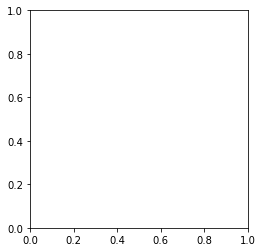

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt #pip install matplotlib
import cv2
idx = 987
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

## Train-Test split

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2)

## Fit the model using SVC and also save the model using joblib

In [6]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 6)
classifier.fit(train_x, train_y)
joblib.dump(classifier, "model/digit_recognizer")

ValueError: could not convert string to float: 'pixel783'

## Calculate accuracy

In [7]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy = ",metrics.accuracy_score(prediction, test_y))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Live prediction

In [8]:
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab

model = joblib.load("model/digit_recognizer")
images_folder = "img/"

while True:
    img = ImageGrab.grab(bbox = (60,170,400,500))
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15,15), 0 )
    
    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation = cv2.INTER_AREA)
    
    rows, cols = roi.shape
    
    X = []
    
    ## Add pixel value one by one in to data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k = 1
            else:
                k = 0
            X.append(k)
    
    predictions = model.predict([X])
    print("Prediction: ", predictions[0])
    cv2.putText(im, "Prediction is: "+ str(predictions[0]), (20,20), 0, 0.8, (0,255,0), 2, cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)
    cv2.waitKey(10000)
    time.sleep(2)
    if cv2.waitKey(1) == 13: # 13 is the ASCII value of Enter
        break
cv2.destroyAllWindows()

    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


AttributeError: 'SVC' object has no attribute '_probA'

## GUI Handwritten digit recognition

In [9]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox

#### only tkinter window

In [ ]:
window = tk.Tk()
window.title("Handwritten digit recognition")

l1= tk.Label(window, text="Digit", font = ('Algerian',20))
l1.place(x=5, y=0)

t1 = tk.Entry(window, width=20, border = 5)
t1.place(x=150, y=0)

b1 = tk.Button(window, text="1. Open paint and capture the screen", font=('Algerian', 15), bg = "orange", fg="black")
b1.place(x=5, y=50)

b2 = tk.Button(window, text="2. Generate dataset", font=("Algerian", 15), fg="blue", bg = "pink")
b2.place(x=5, y=100)

b3 = tk.Button(window, text="3. Train the model, save it and calculate accuracy", font=("Algerian", 15),fg="white", bg="green")
b3.place(x=5, y=150)

b4 = tk.Button(window, text="4. Live prediction",font=("Algerian", 15), fg="red", bg="white")
b4.place(x=5, y=200)

window.geometry("600x300")
window.mainloop()

## Final GUI HDR

In [ ]:
window = tk.Tk()
window.title("Handwritten digit recognition")

l1= tk.Label(window, text="Digit", font = ('Algerian',20))
l1.place(x=5, y=0)

t1 = tk.Entry(window, width=20, border = 5)
t1.place(x=150, y=0)

def screen_capture():
    import pyscreenshot as ImageGrab # pip install pyscreenshot
    import time
    import os
    
    os.startfile("C:/ProgramData/Microsoft/Windows/Start Menu/Programs/Accessories/Paint")
    s1 = t1.get()
#     os.chdir("C:/Users/Ishwar Gautam/Desktop/Handwritten digit Recognition/captured_images")
#     os.mkdir(s1)
#     os.chdir("C:/Users/Ishwar Gautam/Desktop/Handwritten digit Recognition")
    
    images_folder = "captured_images/"+s1+"/"
    time.sleep(15)
    
    for i in range(100, 105):
        time.sleep(8)
        im = ImageGrab.grab(bbox=(60,170,400,500))
        print("saved..",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen and redraw again.....")
    messagebox.showinfo("Result","Capturing screen is completed.....")

b1 = tk.Button(window, text="1. Open paint and capture the screen", font=('Algerian', 15), bg = "orange", fg="black", command=screen_capture)
b1.place(x=5, y=50)

def generate_dataset():
    import cv2 # pip install opencv-python
    import csv
    import glob

    header = ["label"]
    for i in range(0,784):
        header.append("pixel"+str(i))

    with open("dataset.csv","a") as f:
        writer = csv.writer(f)
        writer.writerow(header)

    for label in range(10):
        dirList = glob.glob("captured_images/"+str(label)+"/*.png")
        for img_path in dirList:
            im = cv2.imread(img_path)
            im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            im_gray = cv2.GaussianBlur(im_gray, (15,15), 0)
            roi = cv2.resize(im_gray,(28,28), interpolation = cv2.INTER_AREA)

            data = []
            data.append(label)
            rows,cols = roi.shape

            ##Add pixel one by one into data Array
            for i in range(rows):
                for j in range(cols):
                    k = roi[i,j]

                    if k>100:
                        k=1
                    else:
                        k=0
                    data.append(k)
            with open("dataset.csv","a") as f:
                writer = csv.writer(f)
                writer.writerow(data)     
    messagebox.showinfo("Result","Generating dataset is completed....")
    
b2 = tk.Button(window, text="2. Generate dataset", font=("Algerian", 15), fg="blue", bg = "pink", command=generate_dataset)
b2.place(x=5, y=100)

def train_save_accuracy():
    import pandas as pd #pip install pandas
    from sklearn.utils import shuffle #pip install scikit-learn
    #0,....,1.....,2.....
    #5,3,1,0,2,5,.......

    data = pd.read_csv('dataset.csv')
    data = shuffle(data)
    
    X = data.drop(["label"], axis = 1)
    Y = data["label"]
    
    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2)
    
    import joblib
    from sklearn.svm import SVC
    classifier = SVC(kernel = "linear", random_state = 6)
    classifier.fit(train_x, train_y)
    joblib.dump(classifier, "model/digit_recognizer")
    
    from sklearn import metrics
    prediction = classifier.predict(test_x)
    acc = metrics.accuracy_score(prediction, test_y)
    messagebox.showinfo("Result",f"your accuracy is {acc}")
    
b3 = tk.Button(window, text="3. Train the model, save it and calculate accuracy", font=("Algerian", 15),fg="white", bg="green", command = train_save_accuracy)
b3.place(x=5, y=150)

def prediction():
    import joblib
    import cv2
    import numpy as np #pip install numpy
    import time
    import pyscreenshot as ImageGrab
    import os
    os.startfile("C:/ProgramData/Microsoft/Windows/Start Menu/Programs/Accessories/Paint")
    
    model = joblib.load("model/digit_recognizer")
    images_folder = "img/"
    
    time.sleep(15)
    while True:
        img = ImageGrab.grab(bbox = (60,170,400,500))
        img.save(images_folder+"img.png")
        im = cv2.imread(images_folder+"img.png")

        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15,15), 0 )

        # Threshold the image
        ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
        roi = cv2.resize(im_th, (28,28), interpolation = cv2.INTER_AREA)

        rows, cols = roi.shape

        X = []

        ## Add pixel value one by one in to data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i,j]
                if k>100:
                    k = 1
                else:
                    k = 0
                X.append(k)

        predictions = model.predict([X])
        print("Prediction: ", predictions[0])
        cv2.putText(im, "Prediction is: "+ str(predictions[0]), (20,20), 0, 0.8, (0,255,0), 2, cv2.LINE_AA)

        cv2.startWindowThread()
        cv2.namedWindow("Result")
        cv2.imshow("Result", im)
        cv2.waitKey(10000)
        time.sleep(2)
        if cv2.waitKey(1) == 13: # 13 i       s the ASCII value of Enter
            break
    cv2.destroyAllWindows()


b4 = tk.Button(window, text="4. Live prediction",font=("Algerian", 15), fg="red", bg="white", command=prediction)
b4.place(x=5, y=200)

window.geometry("600x300")
window.mainloop()